In [94]:
#Load Packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
pd.options.display.max_columns=None

In [95]:
#Read all csvs 
df = pd.read_csv('C:\\Users\\btm9355\\Desktop\\opioid2013.csv')
df1 = pd.read_csv('C:\\Users\\btm9355\\Desktop\\opioid2014.csv')
df2 = pd.read_csv('C:\\Users\\btm9355\\Desktop\\opioid2015.csv')
df3 = pd.read_csv('C:\\Users\\btm9355\\Desktop\\opioid2016.csv')

In [96]:
#Create Column for year
df['Year'] = 2013
df1['Year'] = 2014
df2['Year'] = 2015
df3['Year'] = 2016

In [97]:
#Append Files together 
df_apped = df.append(df2, sort=True)
dfp = df_apped.append(df1, sort= True)
dfpp = dfp.append(df3, sort=True)

In [98]:
#Want to rename the dataframe to make it easier to remember this is the raw data appended together 
df_raw = dfpp

In [99]:
#Notice all the missing values or blanks in the data...replace with zero 
df_raw.count()

Extended-Release Opioid Claims              1079634
Extended-Release Opioid Prescribing Rate     465162
NPI                                         4356141
NPPES Provider First Name                   4349272
NPPES Provider Last Name                    3283059
NPPES Provider Last/Org Name                1072972
NPPES Provider State                        4356141
NPPES Provider ZIP Code                     3282964
NPPES Provider Zip Code                     1072931
Opioid Claim Count                          3085346
Opioid Prescribing Rate                     3085346
Specialty Description                       4356141
Total Claim Count                           4356141
Year                                        4356141
dtype: int64

In [100]:
df_final = df_raw.fillna(0)

In [101]:
#No msising values now 
df_final.count()

Extended-Release Opioid Claims              4356141
Extended-Release Opioid Prescribing Rate    4356141
NPI                                         4356141
NPPES Provider First Name                   4356141
NPPES Provider Last Name                    4356141
NPPES Provider Last/Org Name                4356141
NPPES Provider State                        4356141
NPPES Provider ZIP Code                     4356141
NPPES Provider Zip Code                     4356141
Opioid Claim Count                          4356141
Opioid Prescribing Rate                     4356141
Specialty Description                       4356141
Total Claim Count                           4356141
Year                                        4356141
dtype: int64

In [102]:
#Remove all the bullshit columns and keep the ones we care about, but first you want to rename them to make it easier 
df_clean = df_final.rename(columns={'Specialty Description': 'specialty',
                        'Opioid Claim Count': 'opioid_count', 
                        'Total Claim Count': 'claim_count',
                        'NPPES Provider State': 'state',})

In [175]:
#Only selecting the columns I want 
df_clean = df_clean[['NPI','state','claim_count','specialty','opioid_count','Year']]
df_clean.to_csv('C:\\Users\\btm9355\\Desktop\\script\\medicareappended.csv')

In [104]:
df_clean.count()
#Beautiful isnt she

NPI             4356141
state           4356141
claim_count     4356141
specialty       4356141
opioid_count    4356141
Year            4356141
dtype: int64

In [178]:
#Group by Year
#Reset the dataframes for both...column is not callable until you do so
claims_year = df_clean[['Year','claim_count']]
opioids_year = df_clean[['Year','opioid_count']]
grouped_cyears = claims_year.groupby('Year').sum().reset_index()
grouped_oyears = opioids_year.groupby('Year').sum().reset_index()

In [181]:
year_merge = pd.merge(grouped_cyears, grouped_oyears)
year_merge.head()
#Create a column to show the percentage of opioids by overall drugs perscribed 
year_merge['opioid_year'] = year_merge['opioid_count'] / year_merge['claim_count']
year_merge.head()

,Year,claim_count,opioid_count,opioid_year
0,2013,1367999818,78712328.0,0.057538
1,2014,1414071984,80282426.0,0.056774
2,2015,1447170686,78842061.0,0.054480
3,2016,1480972766,78145305.0,0.052766


In [182]:
#Group by Specialty
#Reset the dataframes for both...column is not callable until you do so
claims_special = df_clean[['specialty','claim_count']]
opioids_special = df_clean[['specialty','opioid_count']]
grouped_claims = claims_special.groupby('specialty').sum().reset_index()
grouped_opioid = opioids_special.groupby('specialty').sum().reset_index()

In [183]:
#Merge the datasets together...BOOM
special_merge = pd.merge(grouped_claims, grouped_opioid)
special_merge.head()

,specialty,claim_count,opioid_count
0,Acupuncturist,39919,1488.0
1,Addiction Medicine,674115,98965.0
2,Adult Companion,1679,0.0
3,Advanced Practice Dental Therapist,165,0.0
4,All Other Suppliers,210,0.0


In [184]:
#Create a column to show the percentage of opioids by overall drugs perscribed 
special_merge['opioid_amount'] = special_merge['opioid_count'] / special_merge['claim_count']
special_merge.head()

,specialty,claim_count,opioid_count,opioid_amount
0,Acupuncturist,39919,1488.0,0.037275
1,Addiction Medicine,674115,98965.0,0.146807
2,Adult Companion,1679,0.0,0.000000
3,Advanced Practice Dental Therapist,165,0.0,0.000000
4,All Other Suppliers,210,0.0,0.000000


In [174]:
#Sort by the opioid percentage and cut the data off by 30 subspecialites 
df = special_merge.sort_values(by = 'opioid_amount', ascending = False)
df.to_csv('C:\\Users\\btm9355\\Desktop\\script\\subbreakdown1.csv')

In [169]:
#Create a sepreate dataframe that only take that column 
df = df[['specialty', 'opioid_amount']]
df

,specialty,opioid_amount
181,Pain Management,0.569298
116,Interventional Pain Management,0.565935
92,Hand Surgery,0.553488
12,Anesthesiology,0.536969
175,Orthopedic Surgery,0.461146
54,"Day Training, Developmentally Disabled Services",0.458333
194,Physical Medicine and Rehabilitation,0.418673
152,Neurosurgery,0.407529
159,"Nursing Facility, Other (Dmercs Only)",0.372657
30,Certified Registered Nurse Anesthetist (CRNA),0.343375


In [170]:
df['Opioid Percentage'] = df['opioid_amount'] *100
df.to_csv('C:\\Users\\btm9355\\Desktop\\script\\subbreakdown.csv')

C:\Users\btm9355\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


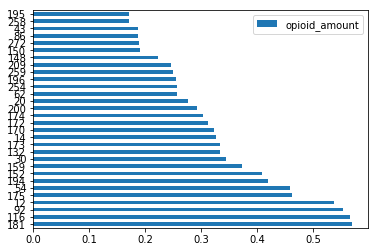

In [143]:
df.plot.barh()